In [14]:
import pandas as pd
import numpy as np
import math
import plotly.express as px 
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pypfopt
from pypfopt import risk_models, expected_returns, plotting
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import objective_functions
from pypfopt.plotting import plot_weights
from scipy.stats import ttest_ind
import copy
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import SimpleRNN,LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
import random
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pandas_datareader.famafrench import get_available_datasets
import pandas_datareader.data as web


## 
#### 

In [15]:
df_w = pd.read_csv("W.csv", index_col="Date")
df_b = pd.read_csv("B.csv", index_col="Date")
len(get_available_datasets())
FF = web.DataReader('F-F_Research_Data_5_Factors_2x3_daily', 'famafrench', start='2017-12-31')
print(FF['DESCR'])
data = FF[0]
data = data.dropna()
data = data/100 
FF_start_date = df_w.first_valid_index()
FF_end_date = df_w.last_valid_index()

FF_data = pd.DataFrame(data[FF_start_date:FF_end_date])


F-F Research Data 5 Factors 2x3 daily
-------------------------------------

This file was created by CMPT_ME_BEME_OP_INV_RETS_DAILY using the 202205 CRSP database. The 1-month TBill return is from Ibbotson and Associates, Inc.

  0 : (1111 rows x 6 cols)


In [16]:
data=list(FF_data.index)
df_w= df_w[:-10]
df_b= df_b[:-10]

test=FF_data.reset_index()
test=test.drop(['Date'],axis=1)
test_2=df_b.reset_index()
Data=pd.concat([test,test_2],axis=1)
Data.set_index('Date')

,Mkt-RF,SMB,HML,RMW,CMA,RF,AMGN,ANET,BIIB,BIO,...,NVDA,REGN,RHI,STLD,SWKS,TPL,TXN,VRTX,WBD,WSM
Date,,,,,,,,,,,,,,,,,,,,,
2018-04-03,0.0124,-0.0003,0.0018,0.0026,0.0017,0.00007,0.013068,0.000000,-0.001536,0.006993,...,0.019434,0.004961,0.025052,0.028478,0.011395,0.007119,0.015201,0.013115,0.020853,0.005225
2018-04-04,0.0117,0.0034,-0.0031,0.0006,-0.0012,0.00007,0.031506,0.021506,0.022216,0.005660,...,0.003958,0.015503,-0.006280,0.008625,0.020486,0.009509,0.019867,0.023743,0.023150,0.023990
2018-04-05,0.0075,0.0005,0.0047,0.0010,0.0027,0.00007,-0.008760,0.014597,-0.027239,-0.012175,...,-0.021482,-0.025967,0.011614,0.024752,-0.008331,0.009246,-0.018904,-0.027510,0.003993,0.014838
2018-04-06,-0.0219,0.0037,-0.0006,0.0014,-0.0004,0.00007,-0.022442,-0.015300,-0.027662,-0.013618,...,-0.032216,-0.027329,-0.035117,-0.045235,-0.032794,-0.020641,-0.027191,-0.021629,-0.000442,-0.032320
2018-04-09,0.0030,-0.0024,-0.0051,-0.0075,-0.0027,0.00007,0.008802,0.003015,-0.000505,0.002868,...,0.005414,0.000282,0.014348,0.004600,0.004814,0.020235,0.003519,0.016272,-0.003979,-0.016899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-24,-0.0123,-0.0046,0.0184,0.0141,0.0115,0.00001,0.011444,-0.025513,0.015747,-0.003879,...,-0.044029,0.006027,-0.026691,-0.000384,-0.023370,0.014326,-0.012181,0.000484,-0.078185,-0.026131
2022-05-25,0.0122,0.0074,0.0021,-0.0053,0.0000,0.00001,0.004446,0.012639,-0.000889,-0.019586,...,0.050823,0.007084,0.015222,0.032522,0.018222,0.042175,0.012808,0.008790,0.021945,0.090168
2022-05-26,0.0218,0.0002,-0.0063,-0.0014,-0.0031,0.00001,0.000158,0.027340,0.009192,0.027312,...,0.051605,-0.010769,-0.005265,0.046503,0.027925,0.026977,0.024234,-0.004394,0.043529,0.130631


In [17]:
sc = StandardScaler()
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(100)
    
data = Data    
cols = list(data.columns)

#### Create one lagged value for each index

In [18]:
def lag(lag):
    cools = []
    for i in range(len(data.columns)):
        col = f'{cols[i]}_{lag}'
        data[col] = data[cols[i]].shift(lag)
        cools.append(col)

In [19]:
lag(1)
data.dropna(inplace=True)
data=data.iloc[:,6:]
data=data.set_index('Date')
data.dropna(inplace=True)
data=data.drop(['Date_1'],axis=1)


In [20]:
data[:756]

,AMGN,ANET,BIIB,BIO,BKNG,DKS,EBAY,EXEL,FFIV,HOLX,...,NVDA_1,REGN_1,RHI_1,STLD_1,SWKS_1,TPL_1,TXN_1,VRTX_1,WBD_1,WSM_1
Date,,,,,,,,,,,,,,,,,,,,,
2018-04-04,0.031506,0.021506,0.022216,0.005660,0.001664,0.039337,0.004544,0.048402,0.007517,0.013322,...,0.019434,0.004961,0.025052,0.028478,0.011395,0.007119,0.015201,0.013115,0.020853,0.005225
2018-04-05,-0.008760,0.014597,-0.027239,-0.012175,0.009696,0.012237,0.006032,-0.009413,-0.001185,0.004830,...,0.003958,0.015503,-0.006280,0.008625,0.020486,0.009509,0.019867,0.023743,0.023150,0.023990
2018-04-06,-0.022442,-0.015300,-0.027662,-0.013618,-0.027584,-0.050886,-0.023482,-0.045701,-0.017663,-0.027236,...,-0.021482,-0.025967,0.011614,0.024752,-0.008331,0.009246,-0.018904,-0.027510,0.003993,0.014838
2018-04-09,0.008802,0.003015,-0.000505,0.002868,0.007539,0.012441,-0.005372,-0.067330,0.000497,0.002745,...,-0.032216,-0.027329,-0.035117,-0.045235,-0.032794,-0.020641,-0.027191,-0.021629,-0.000442,-0.032320
2018-04-10,0.020693,0.029626,0.029396,0.021324,0.014082,0.011410,0.018261,0.076767,0.029550,0.013140,...,0.005414,0.000282,0.014348,0.004600,0.004814,0.020235,0.003519,0.016272,-0.003979,-0.016899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-29,0.008305,-0.011501,-0.001988,-0.014777,0.011977,-0.036587,-0.016110,-0.026884,-0.007888,0.010624,...,0.024252,0.028976,0.026071,0.059331,0.058386,0.030019,0.054401,0.010736,-0.274459,0.037970
2021-03-30,-0.020435,-0.028691,-0.000254,-0.010333,-0.007004,0.028947,0.007853,-0.004982,-0.005508,-0.004447,...,0.008482,0.009666,-0.009852,-0.012512,-0.015699,-0.064423,-0.010733,0.009644,-0.015990,0.004251
2021-03-31,-0.003764,0.010132,0.013550,0.012443,-0.002163,-0.017293,0.015252,0.028220,0.004768,0.006904,...,-0.005900,-0.022533,0.015449,0.031376,-0.004517,0.045830,-0.001289,-0.017166,0.053602,0.024841


In [21]:
X_train = []
y_train = []

n_future = 30  
n_past = 60    
n_cols = 11
set_seeds()
   

MSE_all = []
for j in range(len(data.columns[:28])):
    MSE = []
    for i in range(n_past, len(data[:756]) - n_future +1,30):
        X_train = data[:756].iloc[i-n_past:i,28:]
        y_train = data[:756].iloc[i-n_past:i,j]
        X_test = data[:756].iloc[i:i+n_future,28:]
        y_test = data[:756].iloc[i:i+n_future,j]
        X_train_scaled = sc.fit_transform(X_train)
        X_test_scaled = sc.fit_transform(X_test)
        model=MLPRegressor(hidden_layer_sizes=(10,5,1),activation="logistic" , max_iter=2000,learning_rate_init=.01)
        reg = model.fit(X_train_scaled, y_train)
        y_pred=reg.predict(X_test_scaled)
        MSE.append(mean_squared_error(y_pred, y_test))
    MSE_all.append(np.mean(np.array(MSE)))

#### The model below is my optimal version:

In [22]:
np.mean(np.array(MSE_all))

0.0023323069783450366

In [24]:
df_test = pd.DataFrame(index = data.columns[0:28])
df_test['Avg MSE'] = MSE_all

In [26]:
df_test

,Avg MSE
AMGN,0.001334
ANET,0.002535
BIIB,0.002642
BIO,0.001742
BKNG,0.002175
DKS,0.002972
EBAY,0.001638
EXEL,0.002750
FFIV,0.001621
HOLX,0.001872


In [12]:
y_test_all  = pd.DataFrame()

In [13]:
data[756:906]

,AMGN,ANET,BIIB,BIO,BKNG,DKS,EBAY,EXEL,FFIV,HOLX,...,NVDA_1,REGN_1,RHI_1,STLD_1,SWKS_1,TPL_1,TXN_1,VRTX_1,WBD_1,WSM_1
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-06,-0.011586,-0.012027,-0.022024,0.008150,0.005321,0.018250,-0.018370,-0.006388,0.000325,0.004841,...,0.012721,0.020277,0.006825,0.016676,0.021044,-0.007506,0.025357,0.010702,-0.038559,0.004394
2021-04-07,-0.003934,-0.000169,-0.013762,-0.018569,-0.004690,-0.008169,-0.012156,0.003858,-0.020664,-0.024358,...,-0.009008,-0.012135,0.014836,-0.011000,-0.014453,0.004723,-0.011882,-0.000093,0.041787,0.021927
2021-04-08,-0.004998,0.011136,-0.008544,0.027036,0.007197,0.006761,0.006962,-0.002562,0.003082,0.009328,...,0.020344,0.006497,0.002899,-0.003317,-0.008736,0.010705,-0.007709,-0.011983,0.000231,-0.044304
2021-04-09,0.008385,0.013828,0.009182,0.017459,0.009090,0.003175,0.004502,-0.010274,-0.005342,0.000680,...,0.012267,-0.011270,0.008294,-0.005873,0.012979,-0.001414,0.010928,-0.011470,-0.034801,0.037512
2021-04-12,-0.000040,-0.004893,-0.020025,0.002357,-0.016738,0.016310,0.002721,-0.003893,-0.015303,0.010729,...,0.005797,-0.002498,0.013833,0.008074,-0.004904,-0.007514,0.001178,0.014600,0.002865,-0.011278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-29,-0.000965,0.006506,0.006834,0.007429,-0.003700,0.006809,0.059522,-0.011489,-0.011053,0.008946,...,0.020040,0.060363,0.022287,0.014405,0.023749,0.015842,0.004115,0.005858,0.030085,0.012258
2021-11-01,0.013625,-0.002734,0.020324,-0.013238,0.028466,-0.027292,-0.005474,0.008833,0.018802,-0.008594,...,0.025099,0.023593,0.006140,0.009009,-0.015956,0.008776,-0.002076,0.016099,-0.035788,0.008580
2021-11-02,0.021307,0.203893,0.001507,-0.006478,-0.014403,0.028720,-0.018349,0.008295,0.034864,-0.024353,...,0.010169,-0.001234,0.010259,-0.028299,0.015976,0.031115,-0.000053,0.002542,0.041809,0.011038


In [27]:
X_train = data[756:906].drop(data.columns[0:28],axis=1)
X_test = data[906:].drop(data.columns[0:28],axis=1)
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test) 

model = MLPRegressor(hidden_layer_sizes=(10,5,1),
                   activation="logistic", 
                   max_iter=2000,
                   learning_rate_init=.01)

y_test_pall = pd.DataFrame()
MSE_all  = []

In [28]:
for i in range(len(data.columns[0:28])):
    y_train = data.iloc[756:906, i]
    y_test = data.iloc[906:, i]
    reg = model.fit(X_train_scaled, y_train)
    y_pred = reg.predict(X_test_scaled)
    col_name = y_train.name + '_pred'
    y_test = y_test.to_frame()
    y_test[col_name] = y_pred
    mse = mean_squared_error(y_test[y_train.name], y_test[col_name])
    MSE_all.append(mse)
    y_test = y_test[col_name]
    y_test_pall = pd.concat([y_test_pall,y_test], axis=1)


In [29]:
cov= y_test_pall.copy()

In [30]:
df_8 = pd.DataFrame(index =y_test_pall.columns)
df_8['Avg Daily Return'] = y_test_pall.mean()
df_8['Volatility'] = y_test_pall.std()
df_8['Sharpe Ratio'] = y_test_pall.mean()/y_test_pall.std()
df_8['MSE'] = MSE_all
df_8=df_8.sort_values(by=['Avg Daily Return','Sharpe Ratio'],ascending=False)

df_8= df_8[:9]
df_8

,Avg Daily Return,Volatility,Sharpe Ratio,MSE
WSM_pred,0.066670,0.009603,6.942269,0.006151
BIIB_pred,0.053843,0.007978,6.748730,0.003669
TPL_pred,0.050324,0.013972,3.601862,0.003433
LRCX_pred,0.034508,0.010050,3.433561,0.002310
RHI_pred,0.033408,0.001680,19.886826,0.001649
HPQ_pred,0.033382,0.006759,4.939216,0.001807
BIO_pred,0.025382,0.001500,16.919366,0.001336
NTAP_pred,0.024630,0.002183,11.285036,0.001112
MU_pred,0.022125,0.000398,55.562861,0.001473


In [18]:
col = df_8.index
cov = y_test_pall[col]

In [19]:
y_test_pall

,AMGN_pred,ANET_pred,BIIB_pred,BIO_pred,BKNG_pred,DKS_pred,EBAY_pred,EXEL_pred,FFIV_pred,HOLX_pred,...,NVDA_pred,REGN_pred,RHI_pred,STLD_pred,SWKS_pred,TPL_pred,TXN_pred,VRTX_pred,WBD_pred,WSM_pred
2021-11-05,-0.028505,-0.047185,0.061203,0.023672,-0.042352,-0.056006,-0.036237,-0.053806,0.008213,-0.045116,...,-0.031508,-0.058215,0.034840,-0.047261,0.002172,0.063924,-0.028622,-0.087243,-0.033171,0.076237
2021-11-08,-0.028539,-0.041021,0.052209,0.023411,-0.042703,-0.074306,-0.040861,-0.069587,0.006396,-0.045852,...,-0.038311,-0.067565,0.029231,-0.043562,0.003124,0.039119,-0.028251,-0.075640,-0.034706,0.052259
2021-11-09,-0.028448,-0.049528,0.054247,0.027990,-0.042840,-0.080687,-0.036867,-0.055905,0.011750,-0.045852,...,-0.031490,-0.057872,0.034293,-0.051198,0.008068,0.056348,-0.027967,-0.085292,-0.033967,0.074109
2021-11-10,-0.028652,-0.044299,0.056103,0.026184,-0.042858,-0.066562,-0.038069,-0.059360,0.006887,-0.045443,...,-0.035098,-0.057595,0.034124,-0.047875,0.006061,0.051541,-0.028196,-0.070540,-0.033740,0.069124
2021-11-11,-0.028097,-0.052459,0.048334,0.025869,-0.042913,-0.081599,-0.036766,-0.048808,0.009186,-0.046952,...,-0.037175,-0.057644,0.034215,-0.049318,0.004794,0.049577,-0.028581,-0.080962,-0.033033,0.055521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-24,-0.028321,-0.047852,0.061728,0.026882,-0.042702,-0.079585,-0.035708,-0.066047,0.007929,-0.044519,...,-0.033028,-0.065409,0.033864,-0.045322,0.003335,0.062806,-0.027871,-0.085356,-0.032936,0.074133
2022-05-25,-0.028031,-0.055512,0.048014,0.023584,-0.042965,-0.080119,-0.038390,-0.053877,0.008628,-0.045068,...,-0.038252,-0.061593,0.031825,-0.047833,0.003930,0.031557,-0.028725,-0.087977,-0.033551,0.063466
2022-05-26,-0.028635,-0.050908,0.064088,0.025174,-0.042640,-0.061576,-0.036899,-0.065314,0.008847,-0.044913,...,-0.030290,-0.059897,0.034535,-0.041670,0.005372,0.063064,-0.027942,-0.066704,-0.033025,0.064180
2022-05-27,-0.028696,-0.047445,0.063821,0.023970,-0.042627,-0.053251,-0.037073,-0.065454,0.004054,-0.045272,...,-0.030009,-0.062762,0.035229,-0.044681,0.007201,0.065693,-0.028018,-0.052006,-0.032943,0.064687


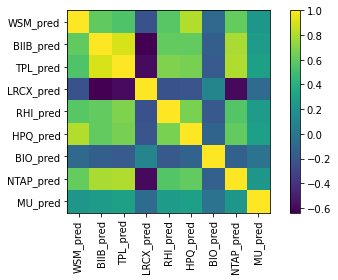

In [28]:
mu = df_8['Avg Daily Return']
S = risk_models.CovarianceShrinkage(cov,returns_data=True,  frequency=252, log_returns=False).ledoit_wolf()
plotting.plot_covariance(S, plot_correlation=True);

# S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()

In [29]:
mu

WSM_pred     0.066670
BIIB_pred    0.053843
TPL_pred     0.050324
LRCX_pred    0.034508
RHI_pred     0.033408
HPQ_pred     0.033382
BIO_pred     0.025382
NTAP_pred    0.024630
MU_pred      0.022125
Name: Avg Daily Return, dtype: float64

In [ ]:
####################get risk free rate from kenneth french#####################
len(get_available_datasets())

ds = web.DataReader('F-F_Research_Data_5_Factors_2x3_daily', 'famafrench', start='2017-12-31')

print(ds['DESCR'])

ds[0].head()
#%%
data = ds[0]
data = data.dropna()
data = data/100 #convert to percent returns
RF_data = (1+data['RF']).cumprod()

RF_start_date = df_w.first_valid_index()
RF_end_date = df_w.last_valid_index()

RF_data = pd.DataFrame(RF_data[RF_start_date:RF_end_date])


In [ ]:
df_8 = pd.DataFrame(index = y_test_pall.index )
y_temp = data.iloc[119:191,0:10]
y_temp

In [ ]:
for i in range(len(y_test_pall.columns)):
    col = y_test_pall.columns[i]
    col_dir = col + '_dir'
    col_str = col + '_str'
    df_8[col_dir] = np.where(y_test_pall[col]> 0.001, 1, -1)
    df_8[col_str] = (df_8[col_dir] * y_temp.iloc[:,i])

In [ ]:
mu = df_7['Avg Monthly Return']
S= risk_models.exp_cov(y_test_pall,returns_data=True,  frequency=12, log_returns=False)
plotting.plot_covariance(S, plot_correlation=True);
ef = EfficientFrontier(mu, S)
ef.add_objective(objective_functions.L2_reg, gamma=1)  
ef.efficient_risk(0.15)
weights = ef.clean_weights()
weights

In [ ]:
S= risk_models.exp_cov(y_test_pall,returns_data=True,  frequency=12, log_returns=False)

In [ ]:
plotting.plot_covariance(S, plot_correlation=True);

In [58]:
sector_mapper = {
    "WSM_pred": "Consumer Discretionary",
    "BIIB_pred": "Biotechnology",
    "TPL_pred": "Real estate ",
    "LRCX_pred": "Semiconductor ",
    "BIO_pred": "Biotechnology ",
    "NTAP_pred": "Technology",
    "MU_pred": "Semiconductor",
    "RHI_pred": "Financial Services",
    "HPQ_pred": "Technology"
}

sector_lower = {
    "Biotechnology": 0.1,
    "Tech": 0.1 # at least 5% to tech
    # For all other sectors, it will be assumed there is no lower bound
}

sector_upper = {
    "Tech": 0.2
}

In [82]:
ef = EfficientFrontier(mu, S)  # weight_bounds automatically set to (0, 1)
# ef.add_objective(objective_functions.L2_reg, gamma=.0001)  # gamme is the tuning parameter
ef.max_sharpe()
weights = ef.clean_weights()
weights

OrderedDict([('WSM_pred', 0.00563),
             ('BIIB_pred', 0.07914),
             ('TPL_pred', 0.0),
             ('LRCX_pred', 0.07737),
             ('RHI_pred', 0.48174),
             ('HPQ_pred', 0.0),
             ('BIO_pred', 0.35611),
             ('NTAP_pred', 0.0),
             ('MU_pred', 0.0)])

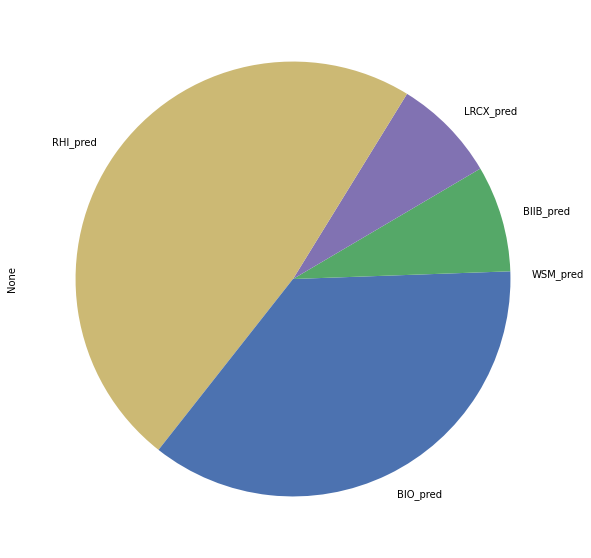

In [83]:
pd.Series(weights).plot.pie(figsize=(10,10));

In [ ]:
df_10_str = df_10.drop(columns = cols)

In [ ]:
df_10_str.sum().apply(np.exp)

In [ ]:
df_10_str.cumsum().apply(np.exp).plot(figsize=(10, 6))